In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [2]:
df = yf.download('AAPL',
                       start='2012-01-01',
                       end='2023-06-01',
                       progress=False)

In [5]:
# Initialize the short, long windows, and alpha
short_window = 50
long_window = 120
alpha = 0.1

In [6]:
# Create a new dataframe called signals with indices taken from our original dataframe.
signals = pd.DataFrame(index=df.index)

In [7]:
signals

""
Date
2012-01-03
2012-01-04
2012-01-05
2012-01-06
2012-01-09
...
2023-05-24
2023-05-25
2023-05-26


In [11]:
#Initialize to zeros 
signals['ema_signal'] = 0.0
signals['ema_positions'] = 0.0
signals['sma_signal'] = 0.0

In [12]:
# Create exponential moving average values for an alpha value
signals['ema'] =  df['Close'].ewm(alpha=alpha, adjust=False).mean()

In [13]:
# Create short simple moving average over the short window. We use the following arguments for the 'rolling' method

# min_periods = 1 - Minimum number of observations in window required to have a value (otherwise result is NA).  

# center = False, so that the labels are not set at the center of the window (default value is actually False,
# so even if we did not use this argument, that would be alright).   
signals['short_mavg'] =  df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

In [14]:

# Create long simple moving average over the long window. We use the following arguments for the 'rolling' method

# min_periods = 1 - Minimum number of observations in window required to have a value (otherwise result is NA).  

# center = False, so that the labels are not set at the center of the window (default value is actually False,
# so even if we did not use this argument, that would be alright).  
signals['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

In [15]:
# Initialize to zero
signals['sma_positions'] = 0.0

In [19]:
signals

,ema,ema_signal,ema_positions,sma_signal,short_mavg,long_mavg,sma_positions
Date,,,,,,,
2012-01-03,14.686786,0.0,0.0,0.0,14.686786,14.686786,0.0
2012-01-04,14.694678,0.0,0.0,0.0,14.726250,14.726250,0.0
2012-01-05,14.718175,0.0,0.0,0.0,14.794047,14.794047,0.0
2012-01-06,14.754929,0.0,0.0,0.0,14.866964,14.866964,0.0
2012-01-09,14.785615,0.0,0.0,0.0,14.905928,14.905928,0.0
...,...,...,...,...,...,...,...
2023-05-24,171.363143,0.0,0.0,0.0,165.841800,152.284833,0.0
2023-05-25,171.525829,0.0,0.0,0.0,166.241800,152.490500,0.0
2023-05-26,171.916245,0.0,0.0,0.0,166.633400,152.720667,0.0


### Computation and plotting of strategy - Part 1

In [21]:
# Change signal values to 1 whenever it is above the price
signals['ema_signal'] = np.where(signals['ema'] > df['Close'], 1.0, 0.0)



In [22]:
# Calculate the position values. Whenever the signal changes from 0 to 1, we will obtain a value of +1
# Whenever the signal changes from 1 to 0, we will obtain a value of -1
signals['ema_positions'] = signals['ema_signal'].diff()


In [34]:
print(signals)

                   ema  ema_signal  ema_positions  sma_signal  short_mavg  \
Date                                                                        
2012-01-03   14.686786         0.0            NaN         0.0   14.686786   
2012-01-04   14.694678         0.0            0.0         0.0   14.726250   
2012-01-05   14.718175         0.0            0.0         0.0   14.794047   
2012-01-06   14.754929         0.0            0.0         0.0   14.866964   
2012-01-09   14.785615         0.0            0.0         0.0   14.905928   
...                ...         ...            ...         ...         ...   
2023-05-24  171.363143         0.0            0.0         1.0  165.841800   
2023-05-25  171.525829         0.0            0.0         1.0  166.241800   
2023-05-26  171.916245         0.0            0.0         1.0  166.633400   
2023-05-30  172.454621         0.0            0.0         1.0  167.079400   
2023-05-31  172.934159         0.0            0.0         1.0  167.476400   

In [35]:
# Initialize the plot figure
fig = plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


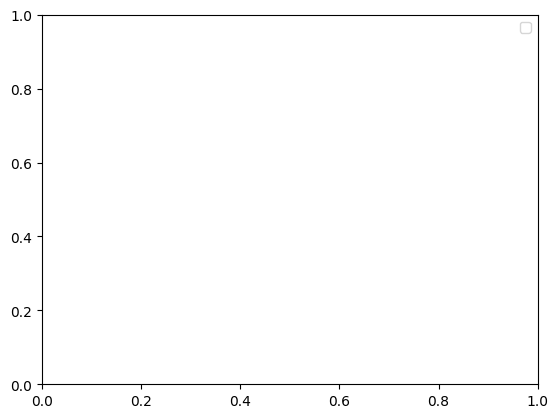

In [36]:
# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Make a subset of signals from January 2018 for clearer visualization
signals2 = signals.loc['2018-01-01':,:]

# Plot the closing price
df.loc['2018-01-01':,'Close'].plot(ax=ax1, color='r', lw=2.,label='Close Price')

# Plot the short and long moving averages
signals2.loc[:,'ema'].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals2.loc[signals2.ema_positions == 1.0].index,
         signals2.ema[signals2.ema_positions == 1.0],
         'o', markersize=10, color='r')

# Plot the sell signals
ax1.plot(signals2.loc[signals2.ema_positions == -1.0].index,
         signals2.ema[signals2.ema_positions == -1.0],
         '^', markersize=10, color='g')

plt.legend()

fig.savefig('strategy_1_signals.png')



In [31]:
# Create signals in the same way we did so in step 3, but this time we assign 1 as a signal whenever the short
# MA is above the long MA

# Since we are using iloc, we need to specify the integer values of the columns. 3, 4 and 5 correspond to the
# 'sma_signal', 'short_mavg' and 'long_mavg' respectively
signals.iloc[short_window:,3] = np.where(signals.iloc[short_window:,4]
                                            > signals.iloc[short_window:,5], 1.0, 0.0)

# Create trading orders similarly to how we did in step 3
signals['sma_positions'] = signals['sma_signal'].diff()
print(signals)

                   ema  ema_signal  ema_positions  sma_signal  short_mavg  \
Date                                                                        
2012-01-03   14.686786         0.0            NaN         0.0   14.686786   
2012-01-04   14.694678         0.0            0.0         0.0   14.726250   
2012-01-05   14.718175         0.0            0.0         0.0   14.794047   
2012-01-06   14.754929         0.0            0.0         0.0   14.866964   
2012-01-09   14.785615         0.0            0.0         0.0   14.905928   
...                ...         ...            ...         ...         ...   
2023-05-24  171.363143         0.0            0.0         1.0  165.841800   
2023-05-25  171.525829         0.0            0.0         1.0  166.241800   
2023-05-26  171.916245         0.0            0.0         1.0  166.633400   
2023-05-30  172.454621         0.0            0.0         1.0  167.079400   
2023-05-31  172.934159         0.0            0.0         1.0  167.476400   

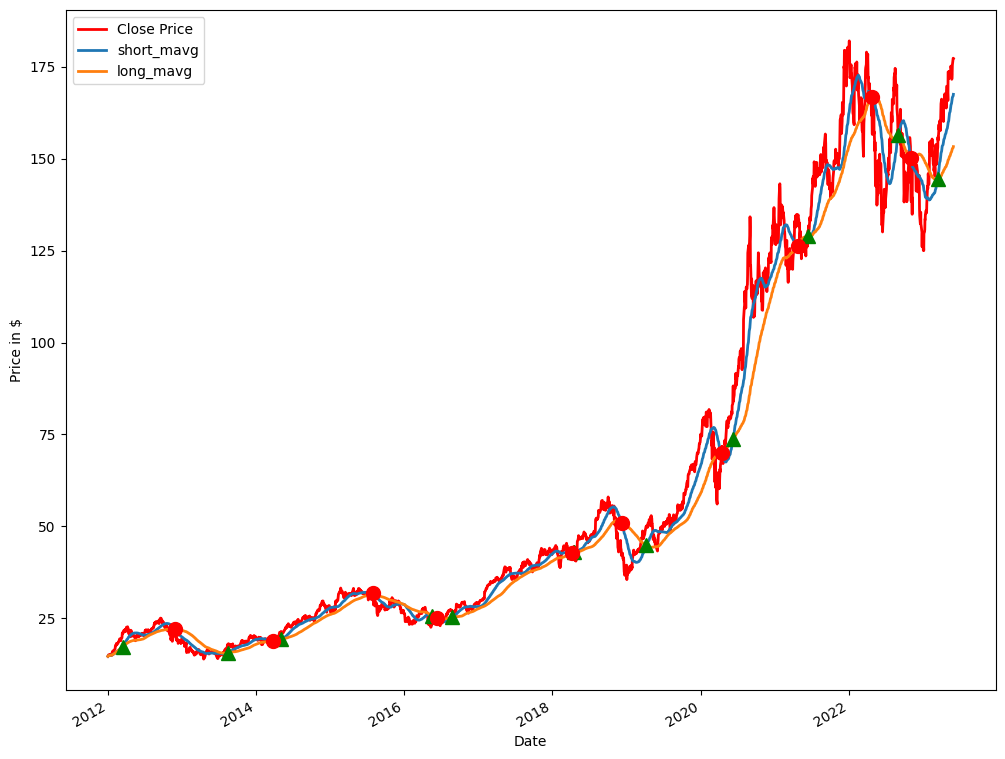

In [32]:
# Initialize the plot figure
fig = plt.figure(figsize=(12,10))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
df['Close'].plot(ax=ax1, color='r', lw=2.,label='Close Price')

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg',]].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.sma_positions == 1.0].index,
         signals.short_mavg[signals.sma_positions == 1.0],
         '^', markersize=10, color='g')

# Plot the sell signals
ax1.plot(signals.loc[signals.sma_positions == -1.0].index,
         signals.short_mavg[signals.sma_positions == -1.0],
         'o', markersize=10, color='r')

plt.legend()

fig.savefig('strategy_2_signals.png')